<a href="https://colab.research.google.com/github/mayurijoshi106/mayuri_INFO5731_spring2020/blob/master/Inclass_INFO%205731_MJ/In_class_exercise_03_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The third in-class-exercise**

We want to extract information about the local weather from the National Weather Service website. Here is the link:

https://forecast.weather.gov/MapClick.php?textField1=33.22&textField2=-97.15#.XaXfI0ZKjb0

**Part one (locate the information we need):**

(1) Download the web page containing the forecast.

(2) Create a BeautifulSoup class to parse the page.

(3) Find the div with id seven-day-forecast, and assign to seven_day

(4) Inside seven_day, find each individual forecast item.

(5) Extract and print the first forecast item.

**Part two (Extracting information from the page):**

As you can see, inside the forecast item tonight is all the information we want. There are 4 pieces of information we can extract:

(1) The name of the forecast item.

(2) The description of the conditions.

(3) A short description of the conditions.

(4) The temperature High.

Write a python program to extract the required information and save it into a csv file with the format showing in the picture.


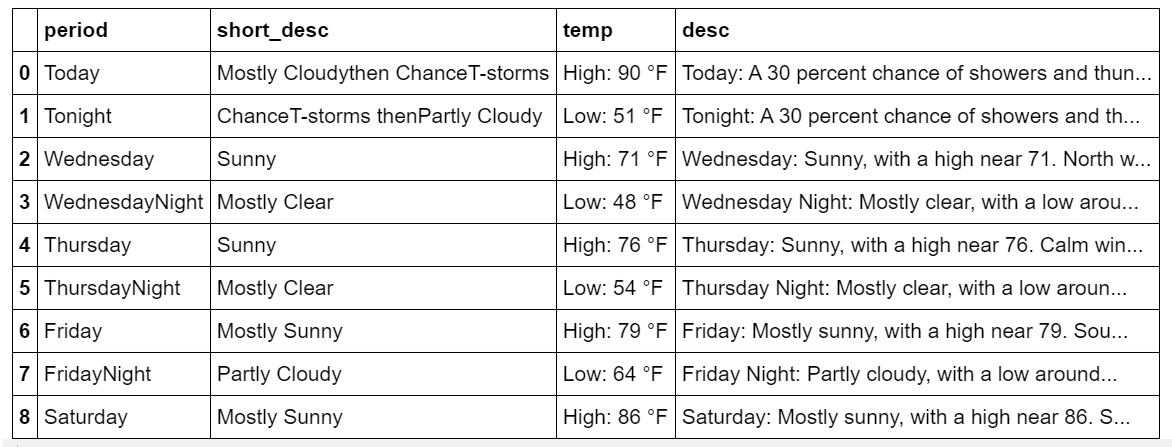

In [2]:

from IPython.display import Image
Image('https://raw.githubusercontent.com/unt-iialab/INFO5731_Spring2020/master/In_class_exercise/data_output.PNG')



In [3]:
import requests
from bs4 import BeautifulSoup

# downloading webpage containing forecast
webpage_url = "https://forecast.weather.gov/MapClick.php?textField1=33.22&textField2=-97.15#.XkMQFmhKhPZ"
ans = requests.get(webpage_url)
ans.content

# creating class BeautifulSoup to parse the page
soup = BeautifulSoup(ans.content, 'html.parser') 
#print(soup.prettify()) 

# to find div with id seven-day-forecast, and assigning it to variable seven_day
seven_day = soup.find(id="seven-day-forecast")

# to find individual forecast item
forecast_item = soup.find_all(class_="tombstone-container")

# to extract and print the first forecast item
first_forecast_item = forecast_item[0]
#print(first_forecast_item)

#part2
forecast_day = first_forecast_item.find(class_="period-name")
print(forecast_day.text)
forecast_short_desc = first_forecast_item.find(class_="short-desc")
print(forecast_short_desc.text)
forecast_temp = first_forecast_item.find(class_="temp")
print(forecast_temp.text)
forecast_img_title = first_forecast_item.find('img')
print(forecast_img_title)
forecast_desc = forecast_img_title['title']
print(forecast_desc)

table_day = [pn.get_text() for pn in seven_day.select(".tombstone-container .period-name")]
table_sd = [sd1.get_text() for sd1 in seven_day.select(".tombstone-container .short-desc")]
table_temp = [tmp.get_text() for tmp in seven_day.select(".tombstone-container .temp")]
print(table_temp)
table_desc = [desc1['title'] for desc1 in seven_day.select(".tombstone-container img")]
 
import csv 
import pandas as pd
print_forecast = {"period":table_day, "short_desc":table_sd, "temp":table_temp, "desc":table_desc}
df = pd.DataFrame(print_forecast)
print(df)
# saving the dataframe into the csv
df.to_csv('myfile.csv')

Tonight
Cloudy
Low: 38 °F
<img alt="Tonight: Cloudy, with a low around 38. North northeast wind 10 to 15 mph, with gusts as high as 20 mph. " class="forecast-icon" src="newimages/medium/novc.png" title="Tonight: Cloudy, with a low around 38. North northeast wind 10 to 15 mph, with gusts as high as 20 mph. "/>
Tonight: Cloudy, with a low around 38. North northeast wind 10 to 15 mph, with gusts as high as 20 mph. 
['Low: 38 °F', 'High: 50 °F', 'Low: 38 °F', 'High: 46 °F', 'Low: 32 °F', 'High: 49 °F', 'Low: 38 °F', 'High: 52 °F', 'Low: 47 °F']
           period  ...                                               desc
0         Tonight  ...  Tonight: Cloudy, with a low around 38. North n...
1       Wednesday  ...  Wednesday: A 40 percent chance of showers afte...
2  WednesdayNight  ...  Wednesday Night: Rain.  Low around 38. Northea...
3        Thursday  ...  Thursday: A 20 percent chance of rain before n...
4   ThursdayNight  ...  Thursday Night: Partly cloudy, with a low arou...
5        